# Section 1

Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: 

Altitude, Actual_river_slope , Elevation_mean_catch , prec_ann_catch , temp_ann , temp_jan , temp_jul. 

Before running the analyses, check if any of the variables requires to be transformed and apply the appropriate transformation. Compute the regression coefficient estimates, the r square and the F statistics. Y ou may plot the fitted model.

In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots  
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


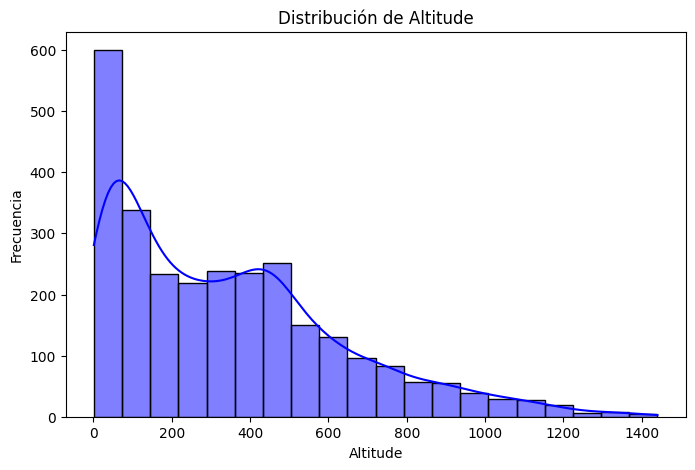

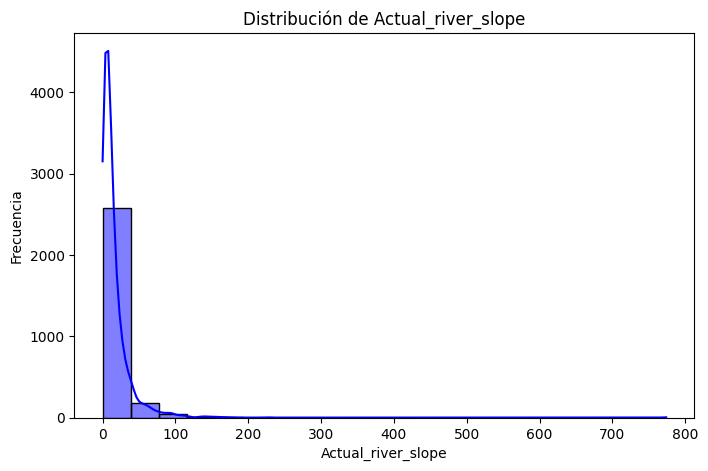

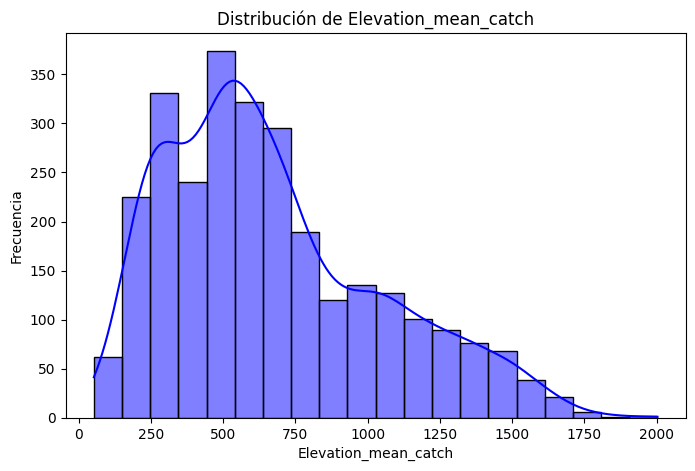

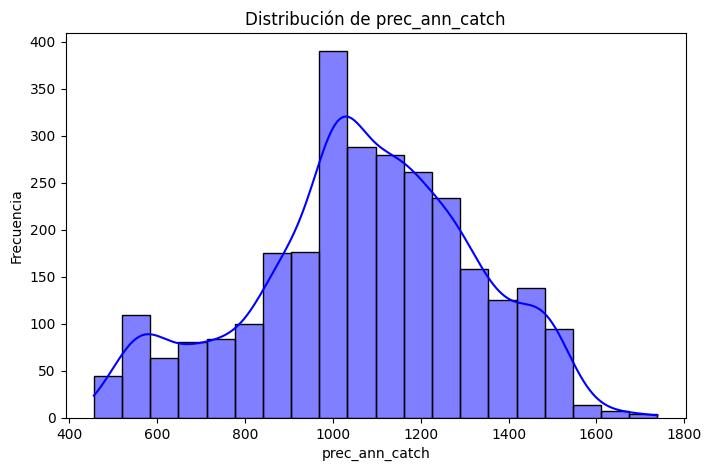

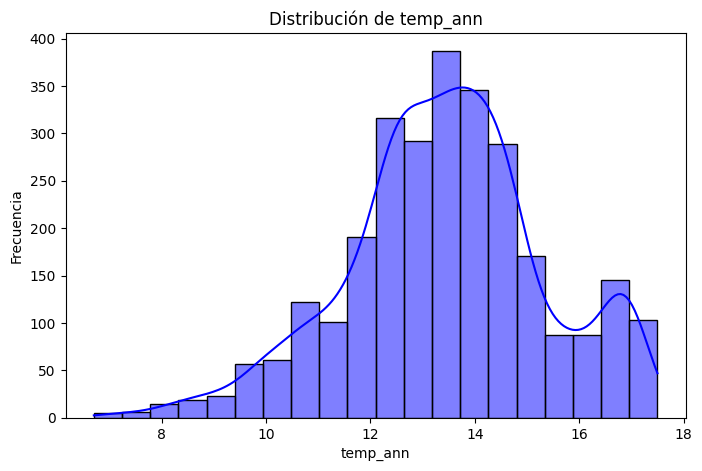

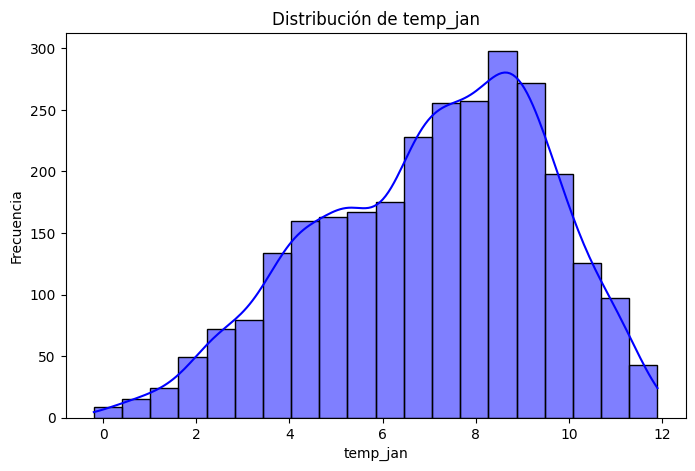

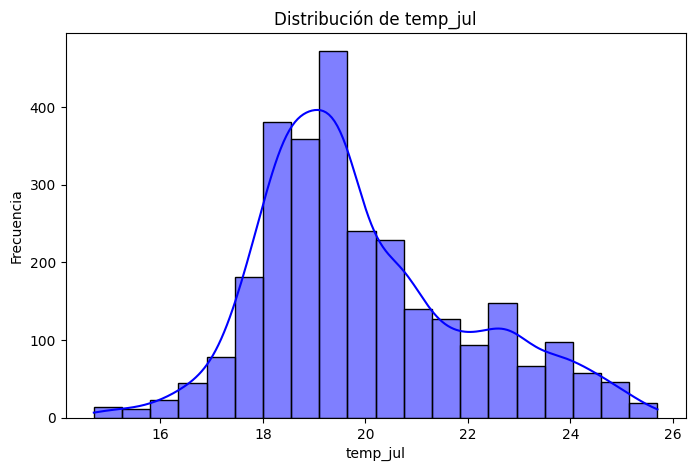

In [5]:
# Seleccionar las variables de interés
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Visualizar la distribución de cada variable
for variable in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df2[variable], kde=True, color='blue', bins=20)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

In [6]:
import numpy as np


# Seleccionar las variables de interés
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']


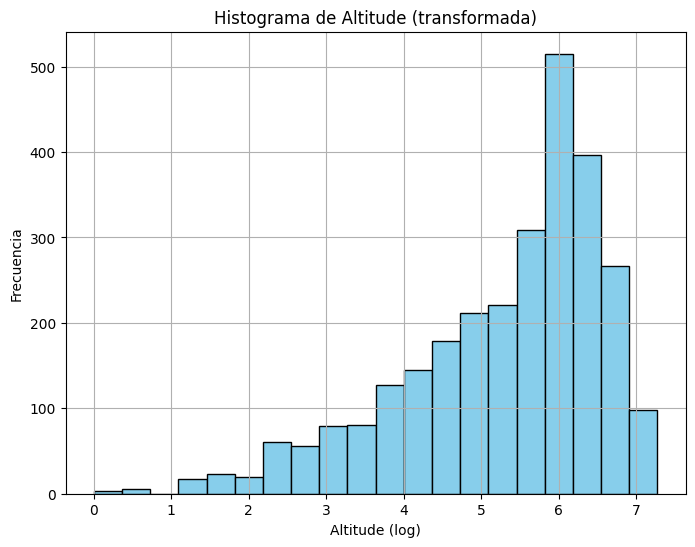

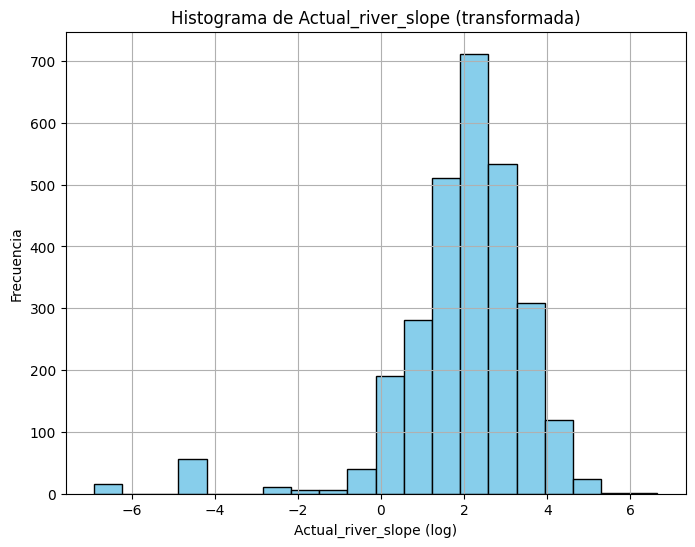

     Site_code   Latitude  Longitude Country Catchment_name  Galiza  \
18  ES_03_0001  41.957268  -2.926857   Spain          Douro       0   
19  ES_03_0002  41.850818  -2.591150   Spain          Douro       0   
28  ES_03_0012  41.498026  -5.528753   Spain          Douro       0   
32  ES_03_0016  41.586853  -3.072064   Spain          Douro       0   
43  ES_03_0029  41.830177  -3.782420   Spain          Douro       0   

    Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
18          1                1              1             1  ...   
19          1                0              1             0  ...   
28          1                0              1             0  ...   
32          1                0              1             0  ...   
43          1                0              1             0  ...   

    Squalius pyrenaicus  Squalius torgalensis  Thymallus thymallus  \
18                    0                     0                    0   
19                    0 

In [49]:
import numpy as np
import pandas as pd

# Crear una copia del DataFrame df2 para mantener los datos originales
df_log_transformed = df2.copy()

# Filtrar valores negativos y ceros en las columnas 'Altitude' y 'Actual_river_slope'
df_log_transformed = df_log_transformed[(df_log_transformed['Altitude'] > 0) & (df_log_transformed['Actual_river_slope'] > 0)]

# Aplicar la transformación logarítmica a las columnas 'Altitude' y 'Actual_river_slope'
df_log_transformed[['Altitude', 'Actual_river_slope']] = np.log(df_log_transformed[['Altitude', 'Actual_river_slope']])

# Mostrar histograma de la columna 'Altitude' (transformada)
plt.figure(figsize=(8, 6))
plt.hist(df_log_transformed['Altitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Altitude (transformada)')
plt.xlabel('Altitude (log)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Mostrar histograma de la columna 'Actual_river_slope' (transformada)
plt.figure(figsize=(8, 6))
plt.hist(df_log_transformed['Actual_river_slope'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Actual_river_slope (transformada)')
plt.xlabel('Actual_river_slope (log)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Mostrar las primeras filas del DataFrame transformado
print(df_log_transformed.head())



In [53]:
pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------  245.8/250.0 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
import openpyxl

# Calcular la riqueza de especies sumando el número de especies presentes en cada fila
df_log_transformed['species_richness'] = df_log_transformed.iloc[:, 56:].gt(0).sum(axis=1)

# Mostrar las primeras filas del DataFrame con la nueva columna 'species_richness'
print(df_log_transformed['species_richness'])
# Guardar el DataFrame como un archivo Excel
df_log_transformed.to_excel('df_log_transformed.xlsx')

18      7
19      7
28      8
32      9
43      8
       ..
5006    6
5007    8
5008    7
5009    2
5010    7
Name: species_richness, Length: 2813, dtype: int64


Regresión lineal entre species_richness y Altitude:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     518.3
Date:                Thu, 09 May 2024   Prob (F-statistic):          1.96e-105
Time:                        19:31:15   Log-Likelihood:                -6260.7
No. Observations:                2813   AIC:                         1.253e+04
Df Residuals:                    2811   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


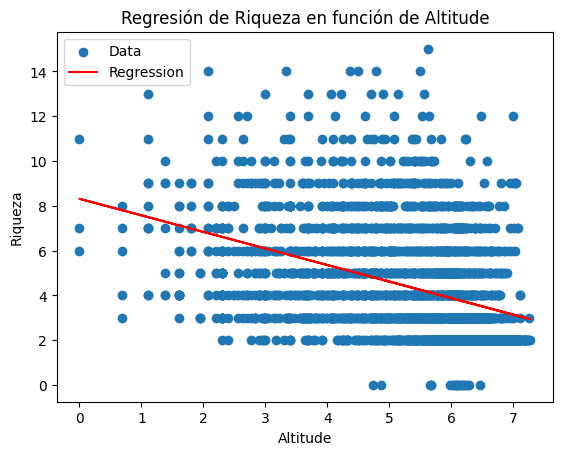

Regresión lineal entre species_richness y Actual_river_slope:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     479.5
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.87e-98
Time:                        19:31:17   Log-Likelihood:                -6277.1
No. Observations:                2813   AIC:                         1.256e+04
Df Residuals:                    2811   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

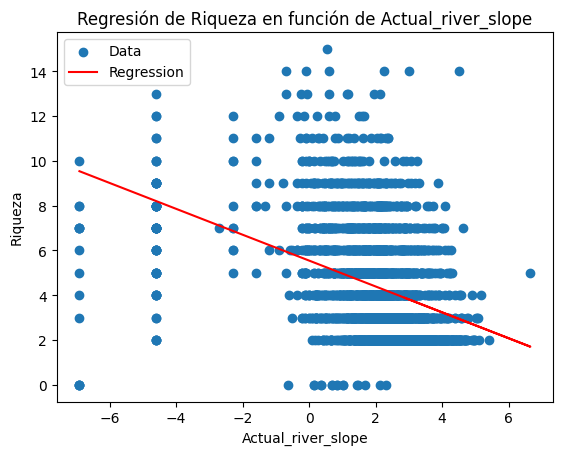

Regresión lineal entre species_richness y Elevation_mean_catch:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     277.8
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.51e-59
Time:                        19:31:18   Log-Likelihood:                -6366.1
No. Observations:                2813   AIC:                         1.274e+04
Df Residuals:                    2811   BIC:                         1.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

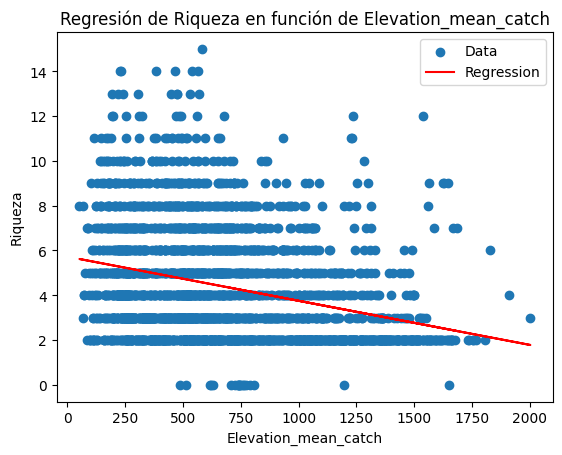

Regresión lineal entre species_richness y prec_ann_catch:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 09 May 2024   Prob (F-statistic):           9.17e-47
Time:                        19:31:20   Log-Likelihood:                -6395.5
No. Observations:                2813   AIC:                         1.279e+04
Df Residuals:                    2811   BIC:                         1.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

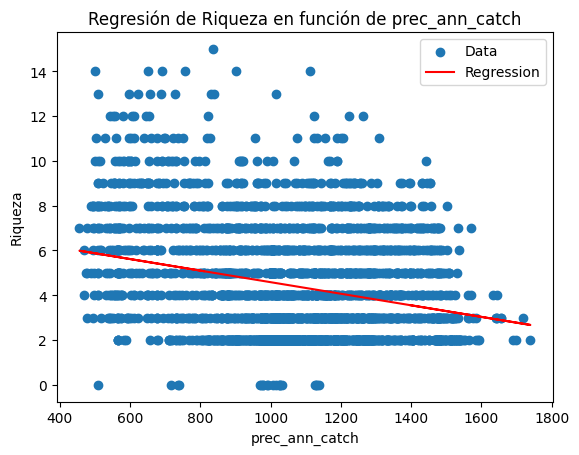

Regresión lineal entre species_richness y temp_ann:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1100.
Date:                Thu, 09 May 2024   Prob (F-statistic):          8.52e-204
Time:                        19:31:22   Log-Likelihood:                -6034.3
No. Observations:                2813   AIC:                         1.207e+04
Df Residuals:                    2811   BIC:                         1.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


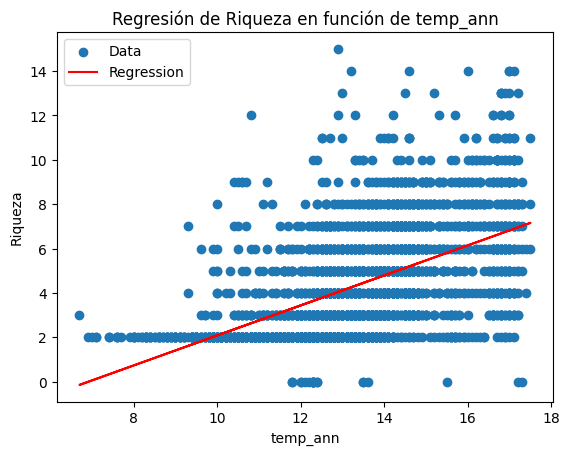

Regresión lineal entre species_richness y temp_jan:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     407.1
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.15e-84
Time:                        19:31:24   Log-Likelihood:                -6308.4
No. Observations:                2813   AIC:                         1.262e+04
Df Residuals:                    2811   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


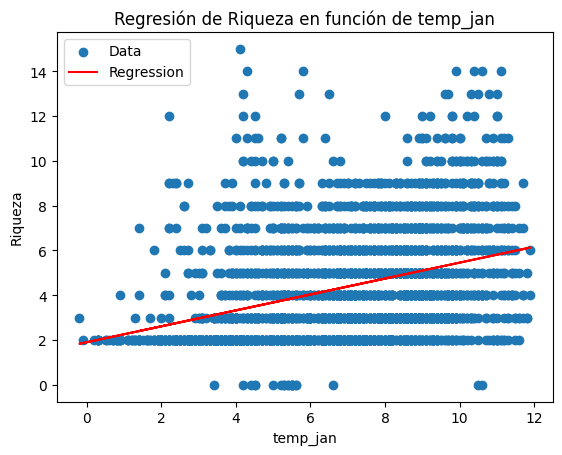

Regresión lineal entre species_richness y temp_jul:
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     1405.
Date:                Thu, 09 May 2024   Prob (F-statistic):          9.15e-250
Time:                        19:31:25   Log-Likelihood:                -5928.5
No. Observations:                2813   AIC:                         1.186e+04
Df Residuals:                    2811   BIC:                         1.187e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


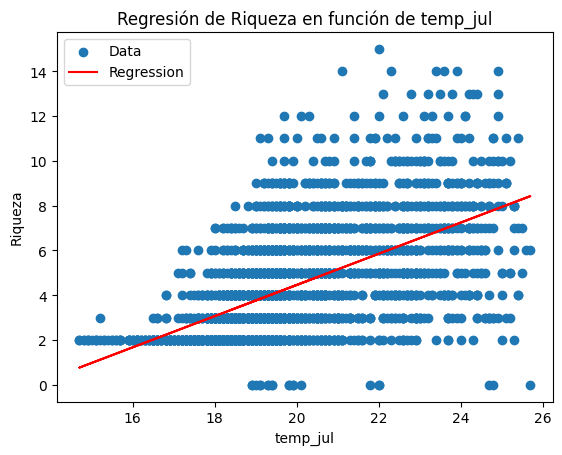

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Definir la variable dependiente (riqueza de especies)
y = df_log_transformed['species_richness']

# Definir las variables independientes (variables ambientales continuas)
X_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Iterar sobre cada variable independiente y ejecutar la regresión lineal
for variable in X_variables:
    # Añadir el intercepto al conjunto de datos independiente
    X = sm.add_constant(df_log_transformed[variable])
    
    # Ajustar el modelo de regresión lineal
    model = sm.OLS(y, X).fit()
    
    # Imprimir los resultados de la regresión
    print(f"Regresión lineal entre species_richness y {variable}:")
    print(model.summary())
    print("\n")
    
    # Plot de la regresión
    plt.figure()
    plt.title(f'Regresión de Riqueza en función de {variable}')
    plt.xlabel(variable)
    plt.ylabel("Riqueza")
    plt.scatter(df_log_transformed[variable], y, label='Data')
    plt.plot(df_log_transformed[variable], model.predict(X), color="red", label='Regression')
    plt.legend()
    plt.show()








# Section 2

                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     288.9
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        19:44:43   Log-Likelihood:                -5735.1
No. Observations:                2813   AIC:                         1.149e+04
Df Residuals:                    2805   BIC:                         1.153e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.5905 

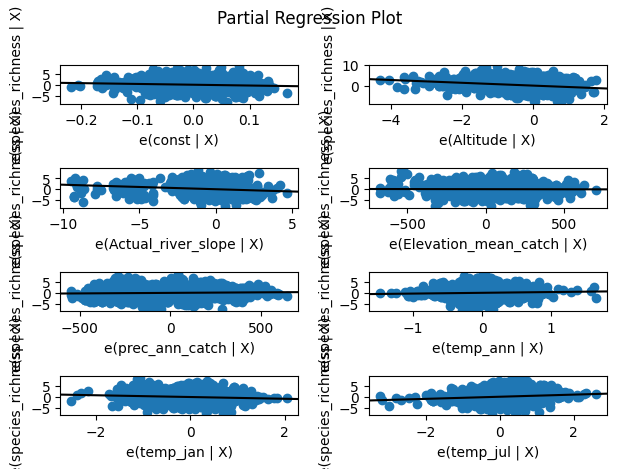

In [61]:
y = df_log_transformed['species_richness']

# Definir las variables independientes (variables ambientales continuas)
x = df_log_transformed[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.5)

# Section 3

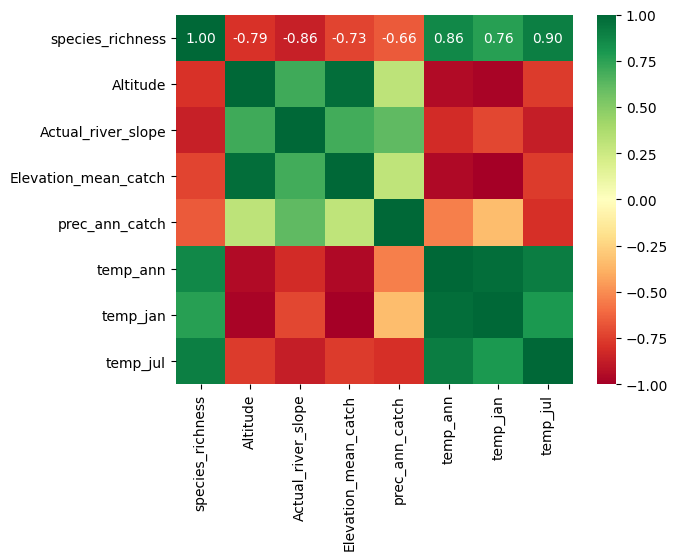

,species_richness
species_richness,1.000000
Altitude,-0.786129
Actual_river_slope,-0.858347
Elevation_mean_catch,-0.734365
prec_ann_catch,-0.656934
temp_ann,0.857933
temp_jan,0.760831
temp_jul,0.898689


In [89]:
import seaborn as sns

# Calcular la matriz de correlación
datoscorr = df_log_transformed[['species_richness', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']].corr()

cormat = datoscorr.corr()

# Redondear la matriz de correlación a dos decimales
cormat_rounded = round(cormat, 2)

# Crear el gráfico
sns.heatmap(cormat_rounded, annot=True, fmt='.2f', cmap='RdYlGn')

# Mostrar el gráfico
plt.show()

# Crear un DataFrame con las correlaciones de SAR
correlation = pd.DataFrame(cormat['species_richness'])

correlation.head(9)


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = x.copy()  


vif_data = vif_data.drop(columns=['const'])# Lo quite porque no vale la pena calcularlo. (Columna adicional de unos que se agrega al conjunto de datos antes de ajustar el modelo de regresión lineal) 

vif_values = pd.DataFrame()
vif_values["Variable"] = vif_data.columns
vif_values["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Mostramos los valores de VIF
print("VIF Values:")
print(vif_values)


VIF Values:
               Variable          VIF
0              Altitude    41.139375
1    Actual_river_slope     3.146594
2  Elevation_mean_catch    18.028505
3        prec_ann_catch    21.471446
4              temp_ann  2253.512678
5              temp_jan   249.072675
6              temp_jul  1264.518168


                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     319.9
Date:                Thu, 09 May 2024   Prob (F-statistic):          4.06e-313
Time:                        20:01:12   Log-Likelihood:                -5765.5
No. Observations:                2813   AIC:                         1.155e+04
Df Residuals:                    2806   BIC:                         1.159e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.3297 

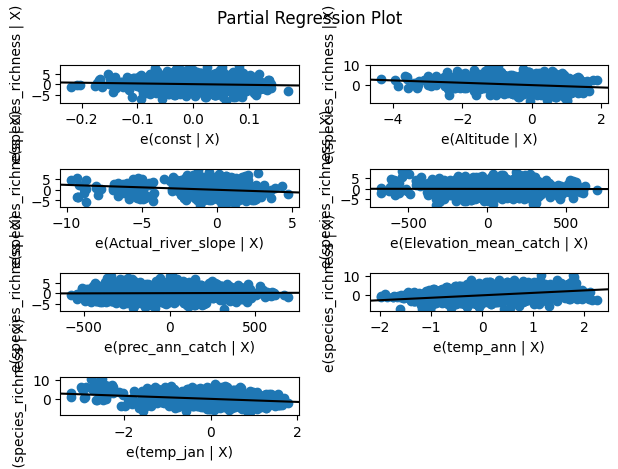

In [96]:
y = df_log_transformed['species_richness']

# Definir las variables independientes (variables ambientales continuas)
x = df_log_transformed[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan']]

x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.5)